In [54]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import cv2
import numpy as np
import pickle
import glob
from image_process import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
def to_rgb(image):
    return np.flip(image,axis=2)

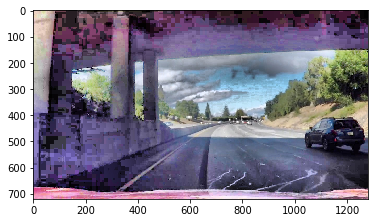

In [56]:
#difficult_image=cv2.imread("./test_images/tunnel_1.jpg")
difficult_image=cv2.imread("./image_dump/adj_tunnel_1.jpg")
plt.imshow(np.flip(difficult_image,axis=2))

## Filter yellow and white parts

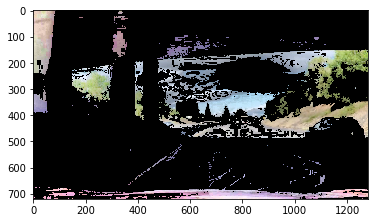

In [57]:
cf=ColorFilter()
wy_image=cf.transform(difficult_image,mask=False)
plt.imshow(to_rgb(wy_image))

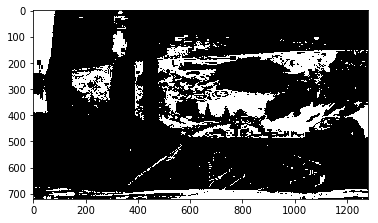

In [58]:
white_binary=cf._filter_white(difficult_image)
plt.imshow(white_binary,cmap='gray')

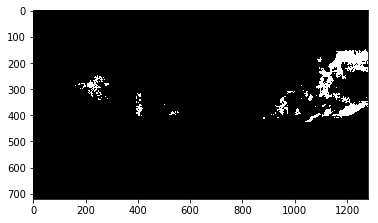

In [59]:
yellow_binary=cf._filter_yellow(difficult_image)
plt.imshow(yellow_binary,cmap='gray')

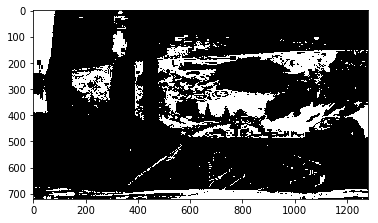

In [60]:
white_binary=cf._filter_white(difficult_image)
plt.imshow(white_binary,cmap='gray')

## To gray space

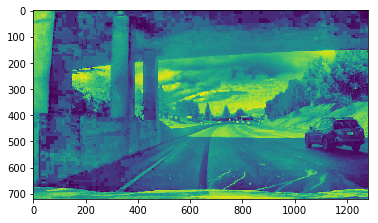

In [61]:
gray=cv2.cvtColor(difficult_image,cv2.COLOR_RGB2GRAY)
plt.imshow(gray)

## To HSV space

In [62]:
hsv=cv2.cvtColor(difficult_image,cv2.COLOR_RGB2HSV)

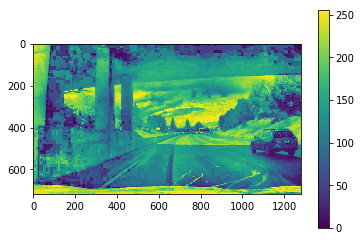

In [63]:
plt.imshow(hsv[:,:,2])
plt.colorbar()

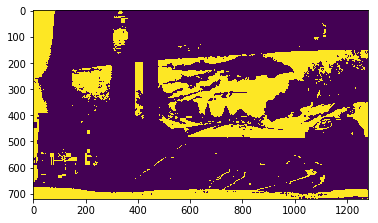

In [64]:
v_binary=hsv_select(difficult_image,thresh=(170,255),channel=2)
plt.imshow(v_binary)

## To HLS space

In [65]:
hls=cv2.cvtColor(difficult_image,cv2.COLOR_RGB2HLS)

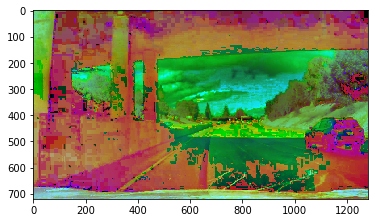

In [66]:
plt.imshow(hls)

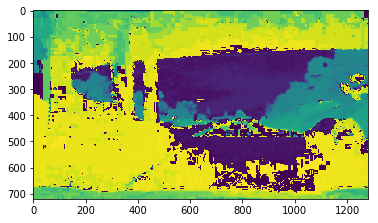

In [67]:
plt.imshow(hls[:,:,0])

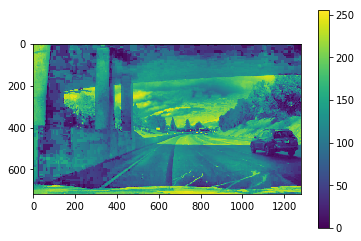

In [68]:
plt.imshow(hls[:,:,1])
plt.colorbar()

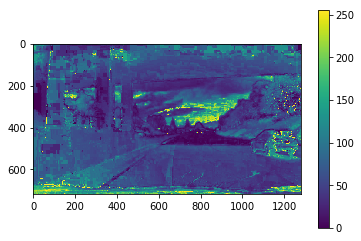

In [69]:
plt.imshow(hls[:,:,2])
plt.colorbar()

## Color filtered image in HLS space

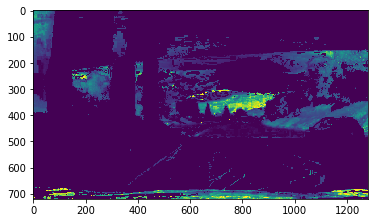

In [70]:
wy_hls=cv2.cvtColor(wy_image,cv2.COLOR_RGB2HLS)
plt.imshow(wy_hls[:,:,2])

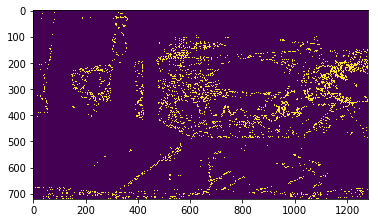

In [71]:
ksize=3
gradx = abs_sobel_thresh(wy_image, orient='x', sobel_kernel=ksize, thresh=(20, 100))
plt.imshow(gradx)

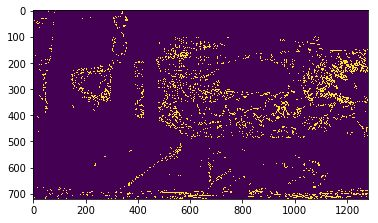

In [72]:
ksize=3
grady = abs_sobel_thresh(wy_image, orient='y', sobel_kernel=ksize, thresh=(20, 100))
plt.imshow(grady)

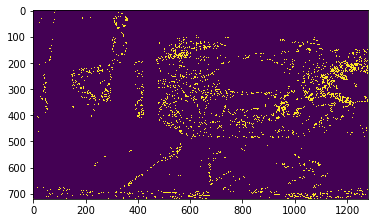

In [73]:
mag_binary=mag_thresh(wy_image,mag_thresh=(30,100))
plt.imshow(mag_binary)

## Creating masks

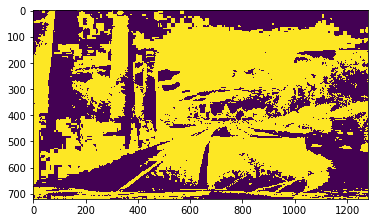

In [74]:
s_binary_1=hls_select(difficult_image,thresh=(90,200),channel=1)
plt.imshow(s_binary_1)

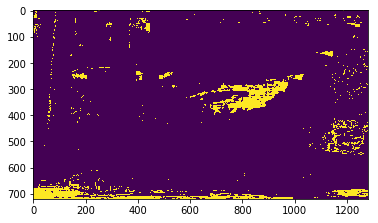

In [75]:
s_binary_2=hls_select(difficult_image,thresh=(140,255),channel=2)
plt.imshow(s_binary_2)

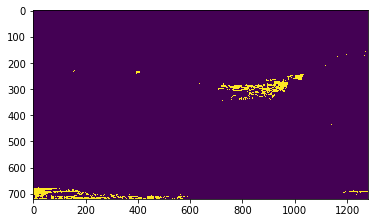

In [76]:
combined=np.zeros_like(s_binary_2)
combined[((s_binary_2==1) & (s_binary_1==1))]=1
plt.imshow(combined)

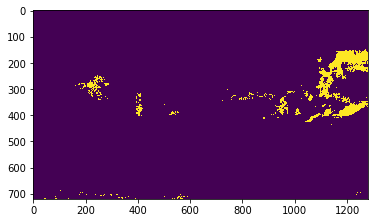

In [77]:
combined=np.zeros_like(s_binary_2)
combined[((s_binary_2==1) & (white_binary==255) & (s_binary_1==1))|(yellow_binary==255)]=1
plt.imshow(combined)

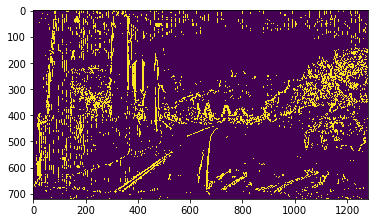

In [78]:
ksize=9
gradx = abs_sobel_thresh(difficult_image, orient='x', sobel_kernel=ksize, thresh=(20, 100))
plt.imshow(gradx)

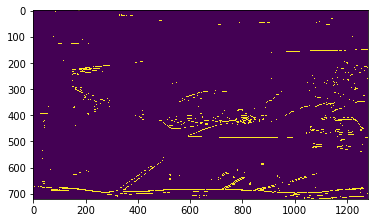

In [79]:
ksize=9
grady = abs_sobel_thresh(difficult_image, orient='y', sobel_kernel=ksize, thresh=(60, 200))
plt.imshow(grady)

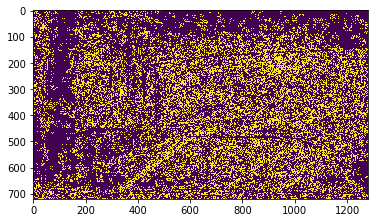

In [80]:
dir_binary=dir_threshold(difficult_image,thresh=(0.7,1.3),sobel_kernel=3)
plt.imshow(dir_binary)

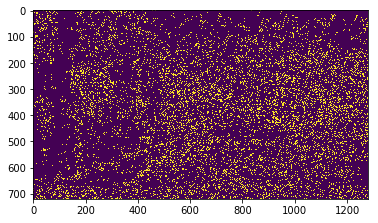

In [81]:
dir_binary_2=dir_threshold(hls[:,:,2],thresh=(0.9,1.2),sobel_kernel=3,to_gray=False)
plt.imshow(dir_binary_2)

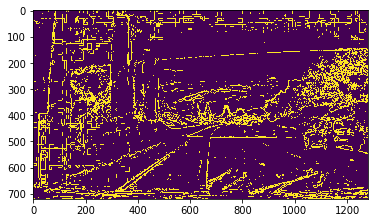

In [82]:
mag_binary=mag_thresh(difficult_image,mag_thresh=(20,100))
plt.imshow(mag_binary)

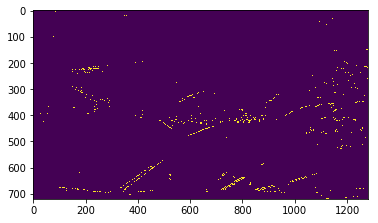

In [83]:
combined=np.zeros_like(dir_binary)
combined[((gradx==1) & (grady==1))]=1
plt.imshow(combined)

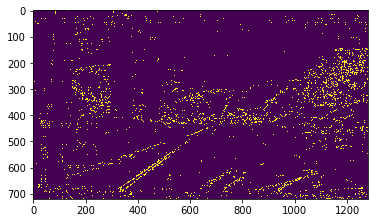

In [84]:
combined=np.zeros_like(dir_binary)
combined[((dir_binary==1) & (mag_binary==1))]=1
plt.imshow(combined)

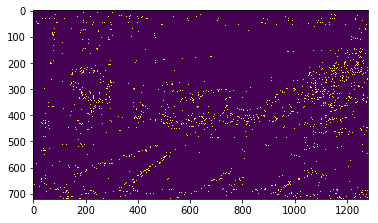

In [85]:
combined=np.zeros_like(dir_binary)
combined[((dir_binary_2==1) & (mag_binary==1))]=1
plt.imshow(combined)

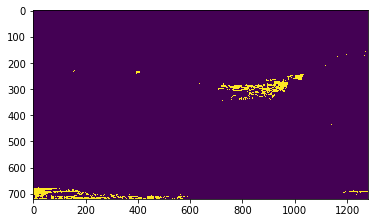

In [86]:
combined=np.zeros_like(dir_binary)
combined[(s_binary_1==1) & (s_binary_2==1)]=1
plt.imshow(combined)

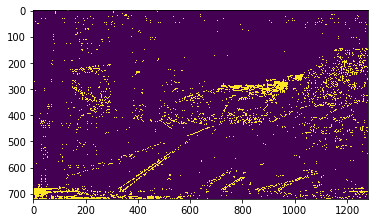

In [87]:
combined=np.zeros_like(dir_binary)
combined[((dir_binary==1) & (mag_binary==1))|((gradx==1) &(grady==1))|((s_binary_1==1) & (s_binary_2==1))]=1
plt.imshow(combined)

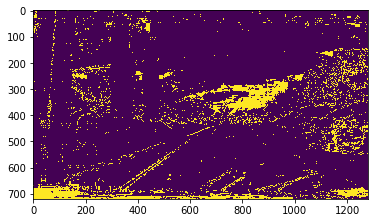

In [88]:
combined=np.zeros_like(dir_binary)
combined[((dir_binary==1) & (mag_binary==1))|((gradx==1) &(grady==1))|((s_binary_2==1))]=1
plt.imshow(combined)

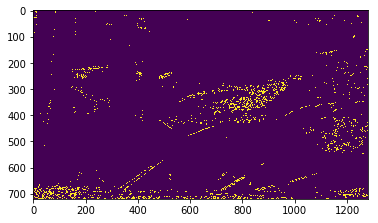

In [89]:
combined=np.zeros_like(dir_binary)
combined[((dir_binary==1) & (s_binary_2==1))|((gradx==1) &(grady==1))]=1
plt.imshow(combined)

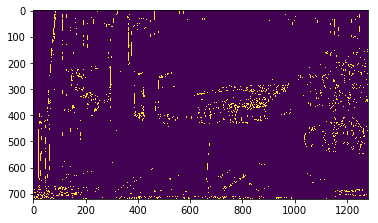

In [90]:
_,ege_image=edge_pipeline(difficult_image)
plt.imshow(ege_image)

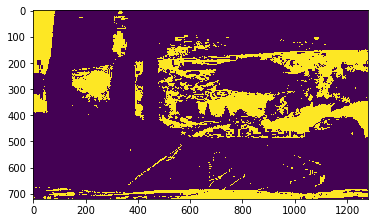

In [91]:
wy_binary=cf.transform(difficult_image)
plt.imshow(wy_binary)

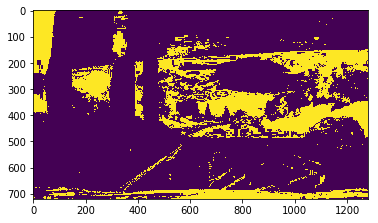

In [92]:
combined=np.zeros_like(dir_binary)
combined[((gradx==1) & (grady==1))|(wy_binary==1)]=1
plt.imshow(combined)

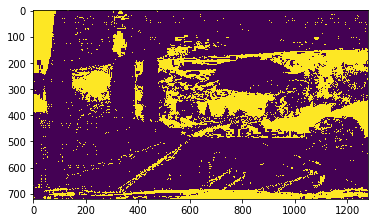

In [93]:
combined=np.zeros_like(dir_binary)
combined[(((dir_binary==1) & (mag_binary==1))|(wy_binary==1))]=1
plt.imshow(combined)

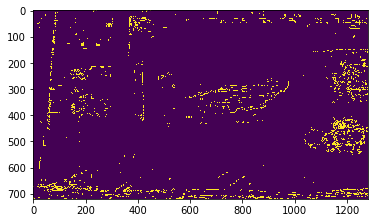

In [94]:
mag_binary=mag_thresh(hls[:,:,2],mag_thresh=(50,150),to_gray=False)
plt.imshow(mag_binary)

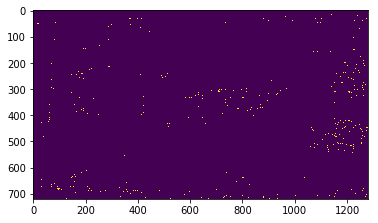

In [95]:
combined=np.zeros_like(dir_binary)
combined[((dir_binary_2==1) & (mag_binary==1))]=1
plt.imshow(combined)

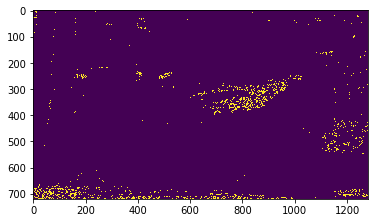

In [96]:
combined=np.zeros_like(dir_binary)
combined[((dir_binary==1) & (s_binary_2==1))]=1
plt.imshow(combined)

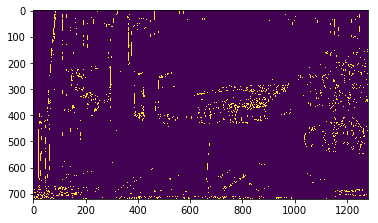

In [97]:
_,ege=edge_pipeline(difficult_image)
plt.imshow(ege)

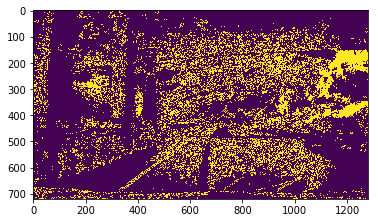

In [98]:
combined=np.zeros_like(s_binary_2)
combined[((s_binary_1==1) & (dir_binary==1))|(yellow_binary==255)]=1
plt.imshow(combined)

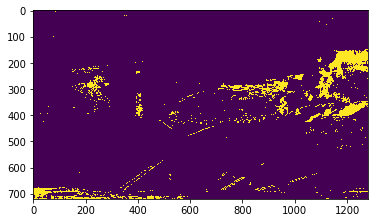

In [99]:
combined=np.zeros_like(s_binary_2)
combined[((s_binary_1==1) & (s_binary_2==1))|(yellow_binary==255)|((gradx==1) & (grady==1))]=1
plt.imshow(combined)

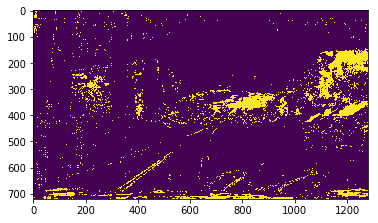

In [100]:
combined=np.zeros_like(s_binary_2)
combined[((s_binary_2==1) & (white_binary==255))|(yellow_binary==255)|((gradx==1)& (dir_binary==1))]=1
plt.imshow(combined)

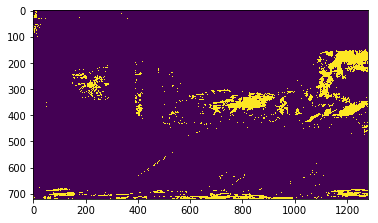

In [101]:
combined=np.zeros_like(s_binary_2)
combined[((s_binary_2==1)&(white_binary==255))|(yellow_binary==255)|((gradx==1)& (dir_binary==1)&(white_binary==255))]=1
plt.imshow(combined)

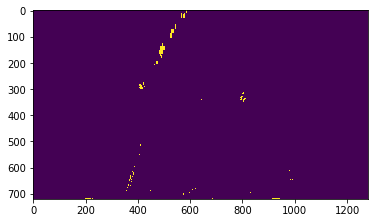

In [102]:
pers=PerspectiveTransformer()
cb=pers.transform(combined)
plt.imshow(cb)